In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls
from mpl_toolkits.mplot3d import Axes3D

def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    x = data[:,0]
    y = data[:,1]
    return x, y

def Least_squares(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.figure(figsize=(16,14))
    plt.plot(x, y, 'o', label="Original Data", markersize=2)
    plt.plot(x, m*x + c, "r", label="Fitted Line")
    plt.legend()
    plt.show()

Loading the data

In [3]:
X = np.array(Read_file("takens_1"))

## 1) Embedding  a  periodic  signal  into  a  state  space 

### a) Plot against time

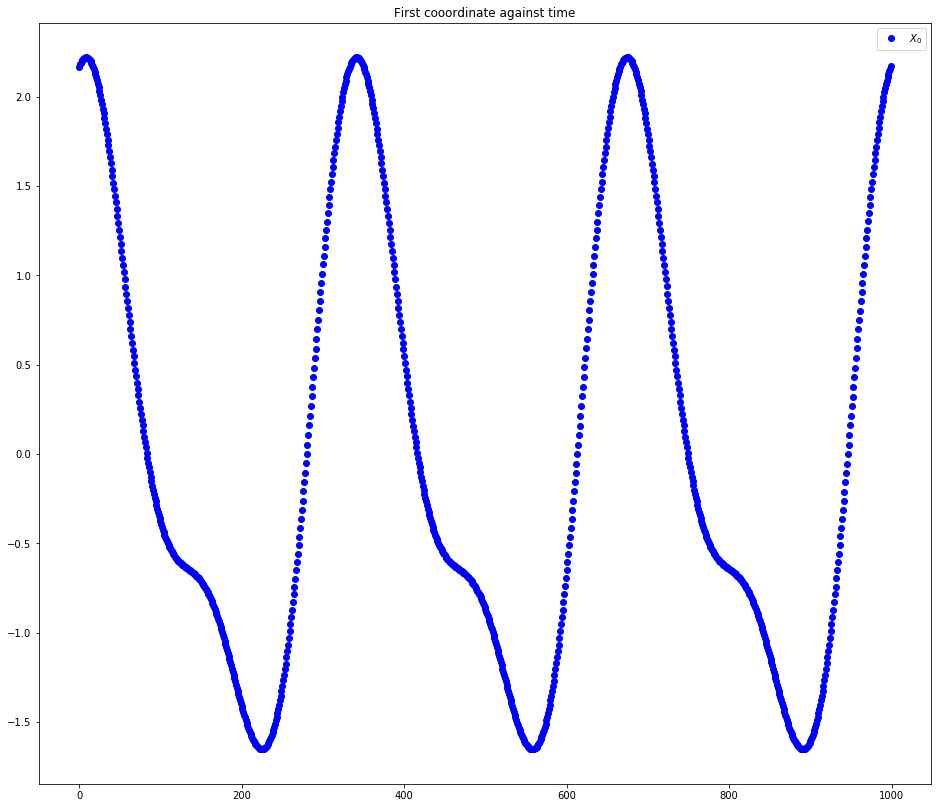

In [5]:
time = range(X.shape[1])
plt.figure(figsize=(16,14))
plt.title('First cooordinate against time')
plt.plot(time,X[0,:], 'o', label=r"$X_0$", color="blue")
plt.legend()
plt.show()

### b) Plot the coordinate against its delayed version

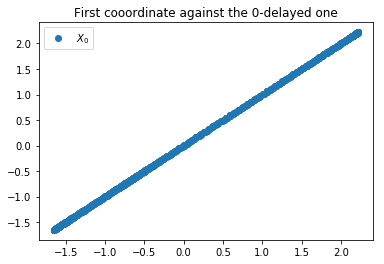

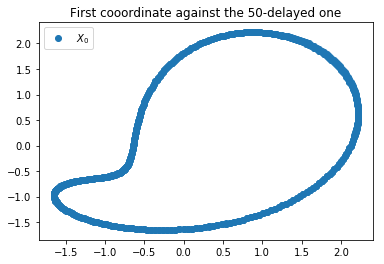

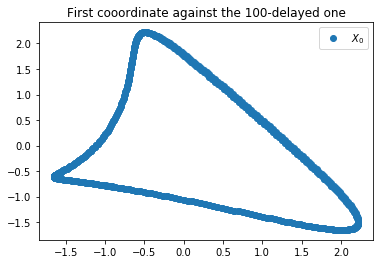

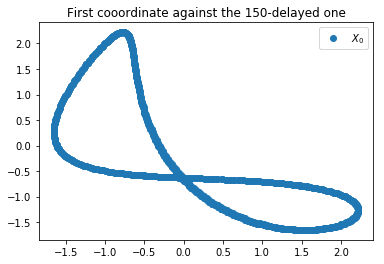

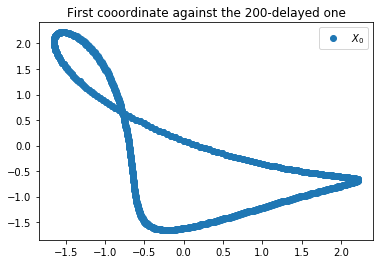

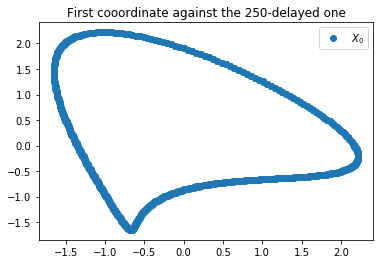

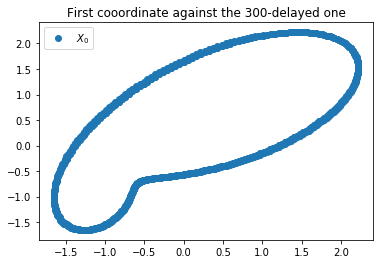

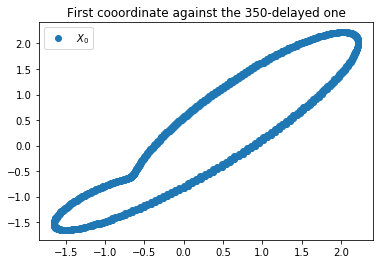

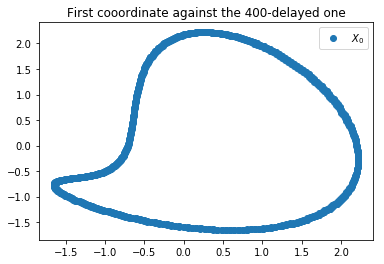

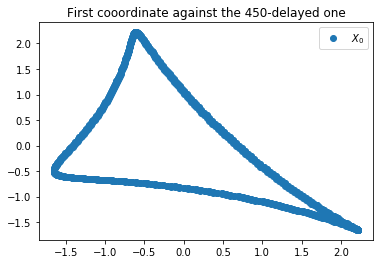

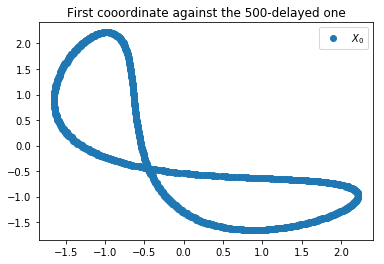

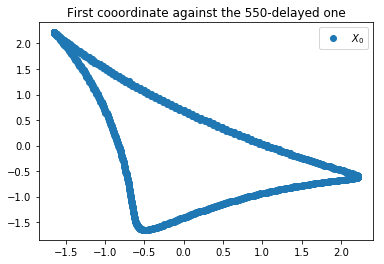

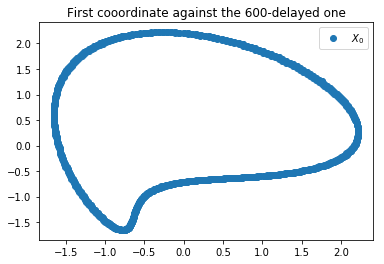

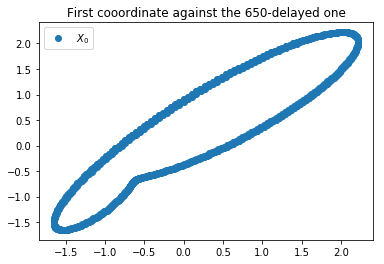

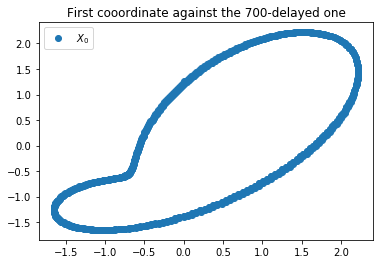

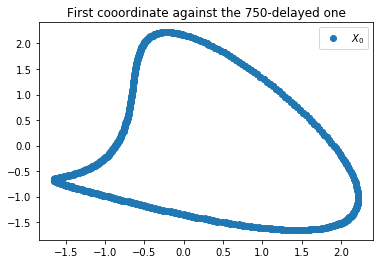

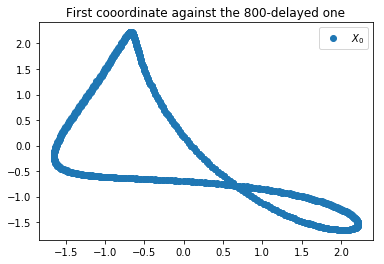

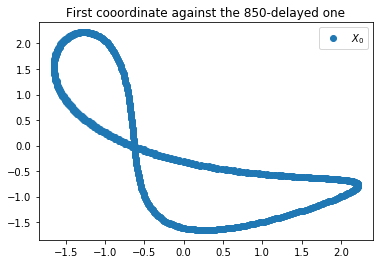

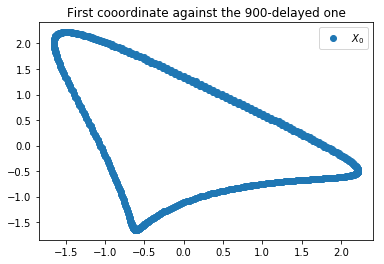

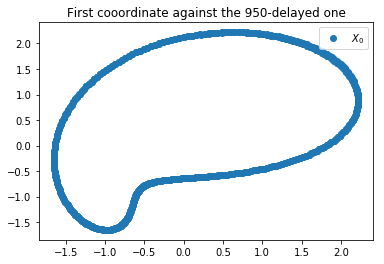

In [14]:
dn = 10
for dn in range(0,1000,50) : 
    delayed = np.array(list(X[0,dn:])+list(X[0,:dn]))
    plt.figure()
    plt.title('First cooordinate against the '+ str(dn)+'-delayed one')
    plt.plot(delayed,X[0,:], 'o', label=r"$X_0$")
    plt.legend()
    plt.show()


# 2) Chaotic dynamics 

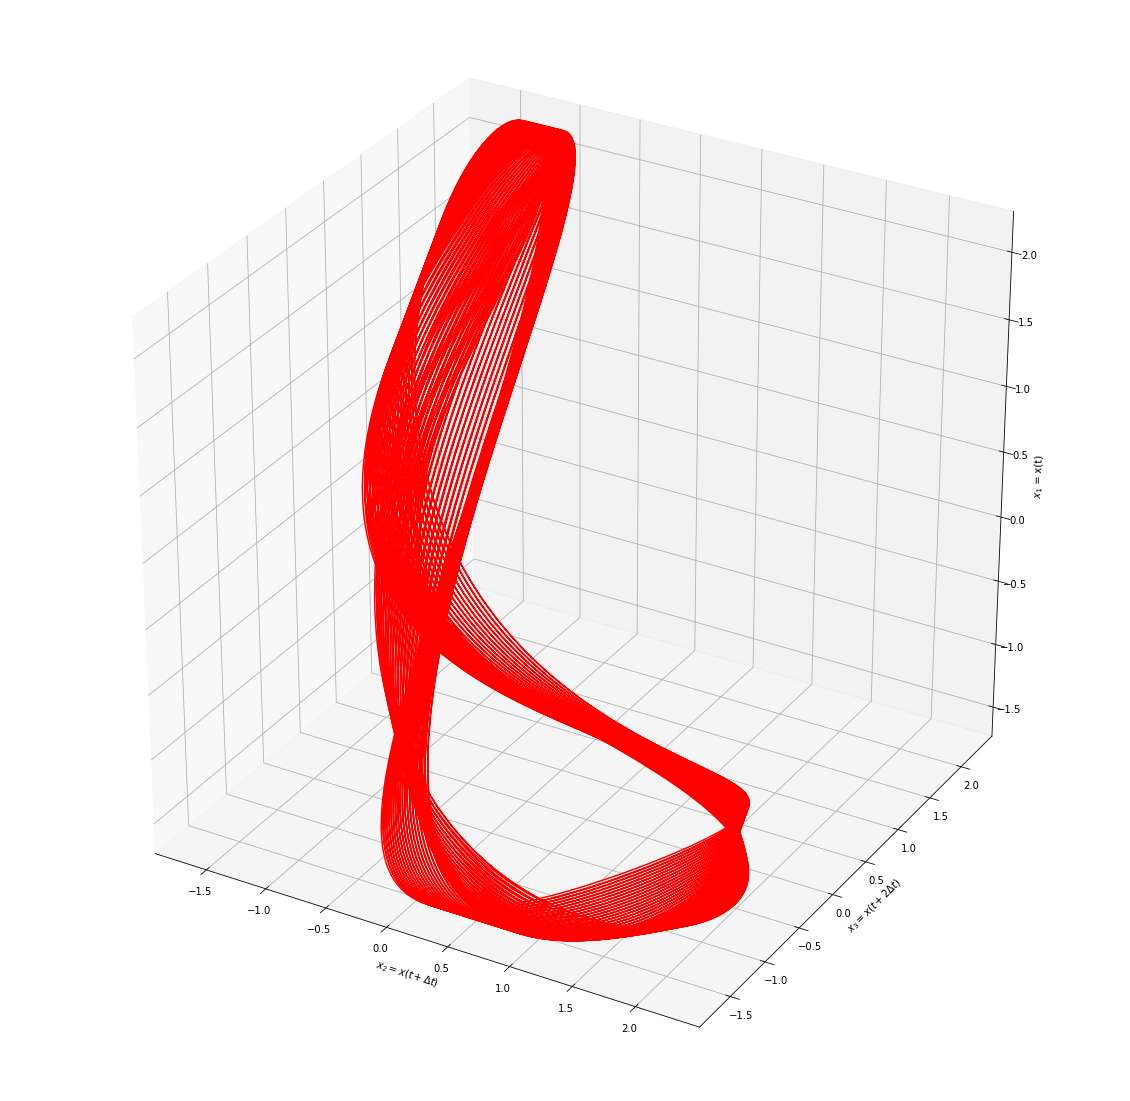

In [45]:
dn = 500






fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


for dn in range(480,520) : 
    X2 = np.array(list(X[0,dn:])+list(X[0,:dn]))
    X3 = np.array(list(X[0,2*dn:])+list(X[0,:2*dn]))
    ax.plot(X2,X3,X[0,:],c='r')

ax.set_xlabel(r'$x_2 = x(t+ \Delta t)$')
ax.set_ylabel(r'$x_3 = x(t+ 2 \Delta t)$')
ax.set_zlabel(r'$x_1$ = x(t)')

plt.show()


# 3) Adding a large number of delays and reducing the dimension.